In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

df = pd.read_csv("student.csv")

In [4]:

print(df.isnull().sum())   #Checking any missing values

Gender          0
Test_01         0
Exam_01         0
Test_02         0
Exam_02         0
Test_03         0
Exam_03         0
Annual_Score    0
Success         0
dtype: int64


In [5]:
df = df.drop_duplicates()  #Dropping duplicates 

In [6]:
df.rename(columns={'Test_01': 'Maths1', 'Exam_01': 'Exam1', 'Test_02': 'Maths2', 
                   'Exam_02': 'Exam2', 'Test_03': 'Maths3', 'Exam_03': 'Exam3', 
                   'Annual_Score': 'AnnualScore', 'Success': 'SuccessStatus'}, inplace=True)#Converting coloumn names for presentable look



In [7]:
df = df.drop(df.iloc[20:].index) #Chosing 20 records for better detailing 
df

,Gender,Maths1,Exam1,Maths2,Exam2,Maths3,Exam3,AnnualScore,SuccessStatus
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1
2,F,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1
3,F,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1
4,F,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1
5,F,36.25,36.25,48.75,62.50,85.0,75.00,57.50,1
6,F,22.50,32.50,17.50,7.50,70.0,65.00,35.56,0
7,F,23.75,71.25,57.50,67.50,97.5,92.50,71.25,1
8,F,45.00,52.50,68.75,40.00,87.5,68.75,58.19,1
9,M,30.00,56.25,28.75,53.75,52.5,42.50,46.25,0


In [8]:
mode = df['Gender'].mode().values[0] #finding mode from gender coloumn
print(f"Most frequent gender: {mode}")

Most frequent gender: F


In [49]:
from scipy.stats import kurtosis
kurtosis = df[["Maths1", "Exam1", "Maths2", "Exam2","Maths3", "Exam3", "AnnualScore"]].apply(kurtosis) # Calculating kurtosis 
print("Kurtosis values :")
print(kurtosis)


Kurtosis values :
Maths1        -1.348875
Exam1          0.182189
Maths2        -0.732339
Exam2         -0.453202
Maths3         1.482609
Exam3         -0.421888
AnnualScore   -0.602273
dtype: float64


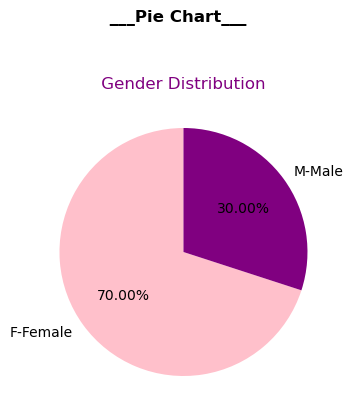

In [53]:
gender = df['Gender'].value_counts().to_dict()# Counting genders

labels = ['F-Female','M-Male'] #details of pie chart
sizes = gender.values()
colors = ['pink', 'purple']

plt.figure(figsize=(4, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors) #plotting pie chart
plt.title(' Gender Distribution ', color='purple')
plt.suptitle(' ___Pie Chart___ ',fontweight='bold')
plt.savefig("piechart.png")
plt.show()


<Figure size 200x300 with 0 Axes>

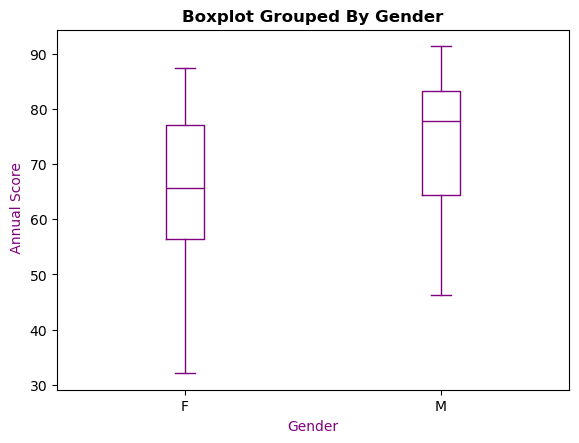

In [59]:
plt.figure(figsize=(2,3))# figure size
df.boxplot(column='AnnualScore', by='Gender',grid=False, color='purple')
plt.title('Boxplot Grouped By Gender',fontweight='bold') #detaling of plot
plt.suptitle('')
plt.xlabel('Gender',color='purple')
plt.ylabel(' Annual Score',color='purple')
plt.savefig("boxplot.png")
plt.show()


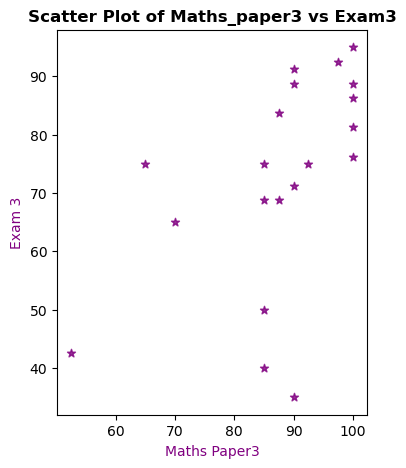

In [63]:
plt.figure(figsize=(4, 5))
plt.scatter(df['Maths3'],df['Exam3'], color='purple',marker='*',alpha=0.8)  #creating scatter plot 

plt.title('Scatter Plot of Maths_paper3 vs Exam3',fontweight='bold')  #adding title and labels
plt.xlabel('Maths Paper3',color='purple')
plt.ylabel('Exam 3',color='purple')
plt.savefig("scatter.png") #saved figure
plt.show()



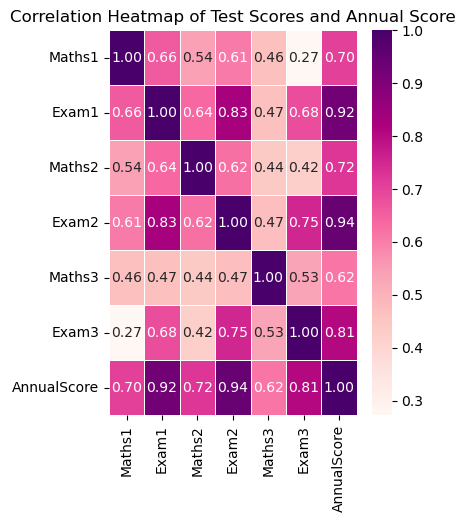

In [13]:
import seaborn as sns
corr_matrix = df.drop(['Gender', 'SuccessStatus'], axis=1).corr() #dropping binary and qualitative values


plt.figure(figsize=(4, 5))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5) #Ploting heatmap
plt.title("Correlation Heatmap of Test Scores and Annual Score")
plt.savefig("correlation_heatmap.png") 
plt.show()
